# Introduction to Financial Forecasting with Python

Welcome to our session on financial forecasting using Python! In this module, we'll dive into the fascinating world of time series analysis and prediction. We'll start by exploring a basic forecasting model using synthetic data to understand the fundamentals of time series forecasting. This will set the foundation for more complex analyses that you'll encounter in real-world financial data.

## The Original Code: A Starting Point
We begin with a Python script that generates synthetic financial data. This data simulates a simple financial time series with a linear trend and some random noise, mimicking a basic scenario in financial forecasting. We'll use this data to:

- Understand the structure of time series data.
- Learn how to split data appropriately for time series forecasting.
- Explore the application of linear regression in a time series context.
- Visualize and evaluate the performance of our forecasting model.

## Upcoming Assignment
After familiarizing yourselves with the original code, you will be tasked with an assignment that builds on these concepts. You'll apply your skills to real financial data, where you will:

- Engage in more complex feature engineering.
- Experiment with different forecasting models.
- Analyze and compare the performance of your models.

The details of the assignment will be provided later in this Jupyter Notebook. This will be your opportunity to apply the concepts learned in a more realistic and challenging setting.

So, let's get started with the original code and begin our journey into the world of financial forecasting!


# Time Series Analysis Assignment: Predicting Stock Prices

## Core Assignment (100 points total)

### Setup and Data Acquisition (0 points)
```python
# Install yfinance package
!pip install yfinance

# Import yfinance and download Apple Inc. stock data
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
```

## Objective:
Students will utilize provided financial data to construct predictive models using linear regression and exponential smoothing. They will then assess the models' performance using various metrics.

### Instructions and Point Breakdown:

- **Model Building (40 points)**
  - Implement linear regression using the rolling averages as features. (20 points)
  - Create an Exponential Smoothing model that accounts for trend and seasonality. (20 points)

- **Performance Metrics (20 points)**
  - Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
  - Provide commentary on the performance of each model based on these metrics.

- **Model Comparison and Interpretation (40 points)**
  - Compare the forecasted values against the actual values in the test set visually using a plot. (10 points)
  - Interpret the results of each model and discuss any potential reasons for differences in performance. (15 points)
  - Discuss the implications of model performance for real-world decision-making in finance. (15 points)




## Extra Credit Assignment (50 points total)

### Objective
Build an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock and compare it to the models in the core assignment.

### Deliverables and Points Breakdown

1. **LSTM Model Implementation (30 points)**
   - Develop an LSTM model on the given dataset.
   - Ensure proper configuration and parameter tuning.

2. **Model Prediction and Visualization (10 points)**
   - Use the model to predict the test dataset.
   - Visualize the prediction results.

3. **Model Evaluation and Comparative Analysis (10 points)**
   - Evaluate the model using appropriate metrics.
   - Compare with the models from the core assignment and discuss the findings.

# Assignment Code

In [ ]:
# %pip install yfinance
# %pip install matplotlib

## Data

###  Data Column Description

* Open: The price at which a stock first trades upon the opening of the stock exchange for that day.
* High: The highest price at which the stock traded during the trading session.
* Low: The lowest price at which the stock traded during the trading session.
* Close: The price at which the stock last traded upon the close of the stock exchange for that day.
* Adj Close (Adjusted Close): The closing price after adjustments for all applicable splits and dividend distributions. This provides a more accurate reflection of the stock's value over time.


In [10]:
import yfinance as yf
import pandas as pd

# Data Acquisition
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data.sort_index(ascending=True, inplace=True)
stock_data = stock_data.asfreq('B', method='ffill')

print(stock_data.head())

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.481125   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.203201   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.489609   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.610199   
2022-01-07  172.889999  174.139999  171.029999  172.169998  169.777832   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


Reviewing the content of our data, we can see that:
* The data is numeric and the date is the index of the data. 
* Notice also that weekends are missing from the records.

## Exploratory Data Analysis

In [ ]:
stock_data.describe()

In [ ]:
stock_data.info()

#### Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. 
A stock’s closing price is the standard benchmark used by investors to track its performance over time.

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(stock_data['Close'])
plt.grid()
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

#### The moving average (MA)
The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

In [ ]:
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

In [ ]:
stock_data[["Close", "7_day_avg", "30_day_avg"]].plot(kind='line', grid=True, figsize=(16,6))

In [ ]:
stock_data['Daily Return'] = stock_data["Adj Close"].pct_change()

In [ ]:
stock_data['Daily Return'].plot(grid=True, figsize=(16,6))

In [ ]:
stock_data['Daily Return'].plot(kind='hist', bins=50, grid=True, figsize=(16,6))

## Data Splitting for ML

In [11]:
from copy import deepcopy


data = deepcopy(stock_data[['Close']])
print(data.shape)
data.head()

(520, 1)


,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998


In [12]:
test_split_date = pd.to_datetime('2023-10-01')
print(f"Test Split date chosen: {test_split_date}")

train_data = data.loc[data.index < test_split_date]
test_data = data.loc[data.index >= test_split_date]

print(f"Train Data {train_data.shape}")
print(f"Test Data: {test_data.shape}")
del data, test_split_date

Test Split date chosen: 2023-10-01 00:00:00
Train Data (455, 1)
Test Data: (65, 1)


In [13]:
train_data.head()

,Close
Date,
2022-01-03,182.009995
2022-01-04,179.699997
2022-01-05,174.919998
2022-01-06,172.000000
2022-01-07,172.169998


In [24]:
import pandas as pd
from copy import deepcopy

def prepare_dataframe_for_ml(df, n_steps):
    df = deepcopy(df)

    for i in range(n_steps, 0, -1):
        df[f'Close(t-{i})'] = df['Close'].shift(i)

    df.dropna(inplace=True)

    return df


def prepare_dataframe_for_ml_with_rolling_averages(df, n_steps, rolling_window):
    df = deepcopy(df)
    
    # Creating rolling average features
    for window in rolling_window:
        df[f'RollingMean_{window}'] = df['Close'].rolling(window=window).mean()
    
    df.dropna(inplace=True)

    return df

LOOK_BACK = 5 # 5 days in a working week
ROLLING_WINDOWS = [3, 5, 10] # Example rolling windows


train_data_ml = prepare_dataframe_for_ml(train_data, LOOK_BACK)
test_data_ml = prepare_dataframe_for_ml(test_data, LOOK_BACK)


train_data_assignment_specific = prepare_dataframe_for_ml_with_rolling_averages(train_data, LOOK_BACK, ROLLING_WINDOWS)
test_data_assignment_specific = prepare_dataframe_for_ml_with_rolling_averages(test_data, LOOK_BACK, ROLLING_WINDOWS)


print(f"ML Training Dataset Size: {train_data_ml.shape},  ML Test Dataset Size: {test_data_ml.shape} ")

print(f"LR Assignment Specific Training Dataset Size: {train_data_assignment_specific.shape},  ML Test Dataset Size: {test_data_assignment_specific.shape} ")

ML Training Dataset Size: (450, 6),  ML Test Dataset Size: (60, 6) 
LR Assignment Specific Training Dataset Size: (446, 4),  ML Test Dataset Size: (56, 4) 


In [52]:
LOOK_BACK_COMPARISON = test_data.shape[0] - test_data_assignment_specific.shape[0]

In [25]:
train_data_ml.head()

,Close,Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1)
Date,,,,,,
2022-01-10,172.190002,182.009995,179.699997,174.919998,172.000000,172.169998
2022-01-11,175.080002,179.699997,174.919998,172.000000,172.169998,172.190002
2022-01-12,175.529999,174.919998,172.000000,172.169998,172.190002,175.080002
2022-01-13,172.190002,172.000000,172.169998,172.190002,175.080002,175.529999
2022-01-14,173.070007,172.169998,172.190002,175.080002,175.529999,172.190002


In [26]:
train_data_assignment_specific.head()

,Close,RollingMean_3,RollingMean_5,RollingMean_10
Date,,,,
2022-01-14,173.070007,173.596670,173.612003,174.886000
2022-01-17,173.070007,172.776672,173.788004,173.992001
2022-01-18,169.800003,171.980006,172.732004,173.002002
2022-01-19,166.229996,169.700002,170.872003,172.133002
2022-01-20,164.509995,166.846664,169.336002,171.384001


9

## Model Building


### Exponential smoothing




#### Types of Exponential Smoothing
* Simple Exponential Smoothing (SES):
    * Best for series with no clear trend or seasonal pattern.
* Holt’s Linear Trend Model:
    * Extends SES to capture linear trends.
* Holt-Winters Seasonal Model:
    * Further extends Holt’s model to capture seasonality.


##### Decide the smoothing parameters
* α for SES, 
* α and β for Holt’s, and 
* α, β, and γ for Holt-Winters

These parameters control the rate at which the weights decrease. Values typically range from 0 to 1.


##### Model Fitting:

Apply the model to the training data to optimize the smoothing parameters using methods like least squares.

##### Forecasting:
Use the fitted model to predict future values.
For each forecasted point, update the level, trend, and seasonal components (if applicable) using the smoothing equations.

In [30]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from pprint import pprint


def is_stationary(y: pd.Series) -> None:
    """
    Check if a time series is stationary using the Augmented Dickey-Fuller test.
    
    Args:
    y (pd.Series): Time series data.
    """
    # "HO: Non-stationary"
    # "H1: Stationary"

    p_value = sm.tsa.stattools.adfuller(y)[1]
    if p_value < 0.05: 
        print(F"Result: Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")
    else: 
        print(F"Result: Non-Stationary (H0: non-stationary, p-value: {round(p_value, 3)})")




def evaluate_seasonality(data: pd.Series) -> int:
    
    """
    Evaluate the seasonality of a time series for different periods using seasonal decomposition.
    
    Args:
    data (pd.Series): Time series data.
    
    Returns:
    int: The period with the lowest mean squared error.
    """
    
    results = {}
    periods = [1, 5, 7, 21, 63]  # Weekly, monthly, quarterly, and yearly periods
    for period in periods:
        decomposition = seasonal_decompose(data, model='additive', period=period)
        seasonal_component = decomposition.seasonal
        residuals = data.squeeze() - seasonal_component
        
        # Example of using residuals for evaluation
        mse = mean_squared_error(data, seasonal_component + residuals.mean())
        results[period] = mse
    
    results = sorted(results.items(), key=lambda x: x[1])
    print("Seasonal Decompose Period evaluation results:\n")
    pprint(results)
    
    
    return results[0][0]


def ts_decompose(y: pd.Series, seasonal_period: int, model="additive", stationary=True) -> None:
    """
    Decompose a time series into trend, seasonal, and residual components.
    
    Args:
    y (pd.Series): Time series data.
    seasonal_period (int): The period of the seasonality.
    model (str): The type of decomposition ('additive' or 'multiplicative'). Default is 'additive'.
    stationary (bool): Whether to check for stationarity after decomposition. Default is True.
    """
    result = seasonal_decompose(y, model=model, period=seasonal_period)
  
    fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)

    axes[0].set_title("Decomposition for " + model + " model")
    axes[0].plot(y, 'k', label='Original ' + model)
    axes[0].legend(loc='upper left')

    axes[1].plot(result.trend, label='Trend & Mean: ' + str(round(result.trend.mean(), 4)))
    axes[1].legend(loc='upper left')

    axes[2].plot(result.seasonal, 'g', label='Seasonality & Mean: ' + str(round(result.seasonal.mean(), 4)))
    axes[2].legend(loc='upper left')

    axes[3].plot(result.resid, 'r', label='Residuals & Mean: ' + str(round(result.resid.mean(), 4)))
    axes[3].legend(loc='upper left')
    plt.show(block=True);

    if stationary:
        is_stationary(y)

In [31]:
seasonal_period_value = evaluate_seasonality(train_data)
seasonal_period_value

Seasonal Decompose Period evaluation results:

[(63, np.float64(275.97973313831335)),
 (21, np.float64(278.2852338047177)),
 (7, np.float64(278.7911053142046)),
 (5, np.float64(278.9020642638938)),
 (1, np.float64(278.91514739234015))]


63

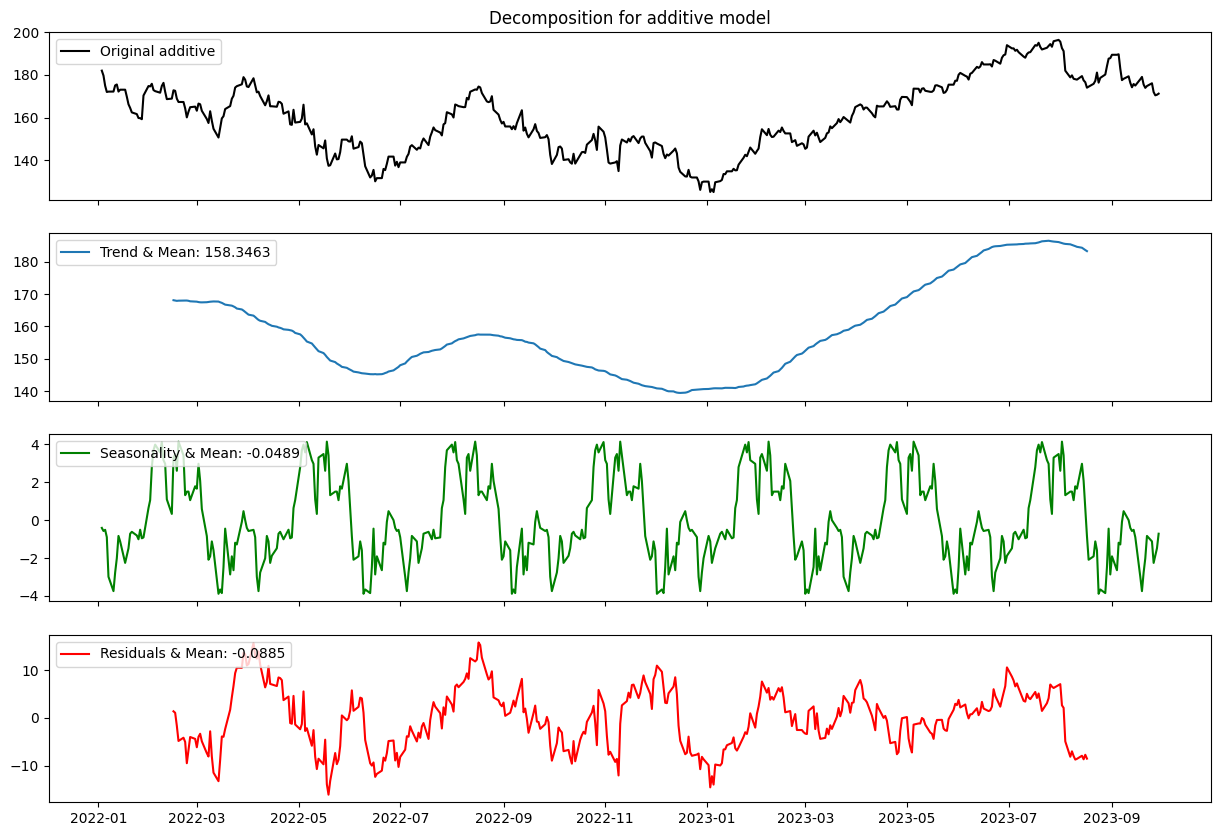

Result: Non-Stationary (H0: non-stationary, p-value: 0.273)


In [32]:
ts_decompose(train_data, seasonal_period_value)

##### Conclusion
* Non-stationary data: Indicates that the data's statistical properties change over time.
* Seasonal patterns with seasonal mean approximately zero: Suggests the presence of seasonal effects, but they may cancel out over the entire period.
* Upward trend with a mean of 160: Indicates a consistent upward trend over time.
* 500 data points available for training: A relatively small dataset.




All in all, Exponential Smoothing might not be suitable for this dataset. But if we want to experiemnt SES might be a good option, once we have made the data stationary.

In [33]:
def single_order_differencing(df):
    """
    Perform single order differencing on a DataFrame to make it stationary.
    
    Args:
    df (pd.DataFrame or pd.Series): Time series data.
    
    Returns:
    pd.DataFrame or pd.Series: Differenced time series data.
    """
    diff = df - df.shift()
    diff.dropna(inplace=True)
    return diff


# Function to invert single order differencing
def invert_single_order_differencing(diff, original_first_value):
    """
    Invert single order differencing to reconstruct the original time series.
    
    Args:
    diff (pd.DataFrame or pd.Series): Differenced time series data.
    original_first_value (float or int): The first value of the original time series.
    
    Returns:
    pd.DataFrame or pd.Series: Reconstructed original time series data.
    """
    # Use cumsum to accumulate the differences
    inverted = diff.cumsum()
    # Add the original first value to reconstruct the original series
    inverted += original_first_value
    return inverted

In [34]:
train_data_diff = single_order_differencing(train_data[['Close']])
is_stationary(train_data_diff)

Result: Stationary (H0: non-stationary, p-value: 0.0)


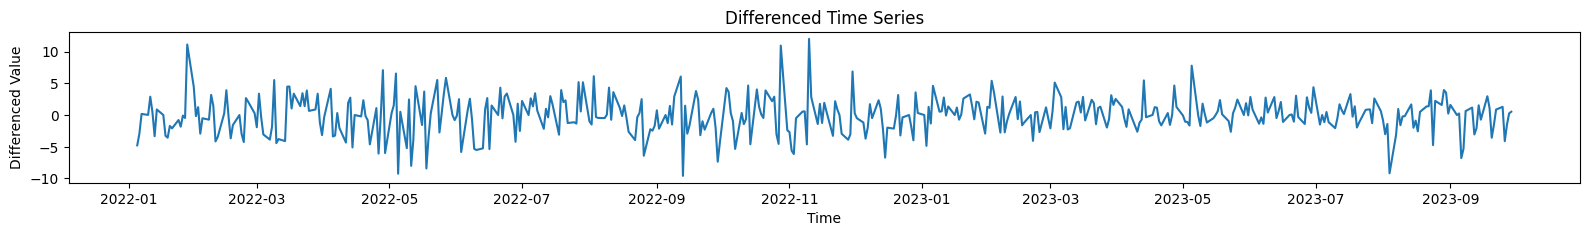

In [35]:
import numpy as np

plt.figure(figsize=(16,6))
# Plot log-transformed time series
plt.subplot(3, 1, 3)
plt.plot(train_data_diff.index[1:], train_data_diff['Close'][1:])
plt.title('Differenced Time Series')
plt.xlabel('Time')
plt.ylabel('Differenced Value')

plt.tight_layout()
plt.show()


#### Simple Exponential Smoothing (SES)
* **This method is suitable only for stationary series.**
* The forecast for the next period is calculated by taking a weighted average of the actual value from the current period and the forecast from the current period.
* The weight (smoothing parameter) applied to the actual value is called alpha (α).
* The equation is:

Next forecast = 𝛼 × (Current actual value) + (1 − 𝛼) × (Current forecast) Next forecast=α×(Current actual value)+(1−α)×(Current forecast)


In [37]:
import numpy as np
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import root_mean_squared_error



def get_best_alpha(data, validation_days):
    """
    Find the best alpha value for Simple Exponential Smoothing based on RMSE over validation data.
    """
    print("Days available in data: ", len(data), "| Validation days used:", validation_days, "\n")
    cut_off_date = data.index[-1] - pd.offsets.BDay(validation_days)
    # Split the DataFrame
    train_data = data[data.index <= cut_off_date]
    val_data = data[data.index > cut_off_date]
    
    # Define smoothing levels to test
    alphas = np.arange(0.05, 0.9, 0.05)

    best_alpha = None
    best_rmse = float('inf')

    for alpha in alphas:
        model = SimpleExpSmoothing(train_data)
        fitted_model = model.fit(smoothing_level=alpha, optimized=False)
        forecast = fitted_model.forecast(steps=validation_days) # forecast for next 7 days
        
        rmse = root_mean_squared_error(val_data, forecast)
        
        print(f'Alpha: {alpha}, RMSE: {rmse}')
        
        if rmse < best_rmse:
            best_rmse = rmse
            best_alpha = alpha
        
        del alpha
        del model, fitted_model, forecast, rmse
    print("\n================")
    print(f'Best alpha: {best_alpha} with RMSE: {best_rmse}')
    return best_alpha

In [38]:
validation_days_value = 30
best_alpha_value = get_best_alpha(data=train_data_diff, validation_days=validation_days_value)

Days available in data:  454 | Validation days used: 30 

Alpha: 0.05, RMSE: 2.7339586438041334
Alpha: 0.1, RMSE: 2.801502813322733
Alpha: 0.15000000000000002, RMSE: 2.820562406002712
Alpha: 0.2, RMSE: 2.8133873611449096
Alpha: 0.25, RMSE: 2.7997091873569673
Alpha: 0.30000000000000004, RMSE: 2.7869693627699412
Alpha: 0.35000000000000003, RMSE: 2.7763694389769507
Alpha: 0.4, RMSE: 2.767028260900911
Alpha: 0.45, RMSE: 2.757830110684294
Alpha: 0.5, RMSE: 2.748095664108688
Alpha: 0.55, RMSE: 2.7377502030002767
Alpha: 0.6000000000000001, RMSE: 2.727273269877616
Alpha: 0.65, RMSE: 2.71755591938755
Alpha: 0.7000000000000001, RMSE: 2.7097364588817094
Alpha: 0.75, RMSE: 2.705056156055209
Alpha: 0.8, RMSE: 2.7047544422651466
Alpha: 0.8500000000000001, RMSE: 2.7100088906156046

Best alpha: 0.8 with RMSE: 2.7047544422651466


In [39]:


# Function to perform rolling forecasts
def get_rolling_forecast(training_data, steps, forecast_steps, alpha):
    """
    Perform rolling forecasts using Simple Exponential Smoothing.
    
    Args:
    training_data (pd.Series): Historical time series data.
    steps (int): Number of periods to forecast ahead in each iteration.
    forecast_steps (int): Total number of forecast periods to generate.
    alpha (float): Smoothing level for Simple Exponential Smoothing.
    
    Returns:
    pd.Series: Forecasted values for the specified number of periods.
    """
    data = deepcopy(training_data.squeeze())
    
    forecasts = []
    for _ in range(forecast_steps):
        model = SimpleExpSmoothing(data).fit(smoothing_level=alpha, optimized=False)
        # Forecast future values
        forecast = model.forecast(steps)
        forecasts.append(forecast.iloc[0])
        
        # Create a future date for the forecasted value
        future_date = pd.date_range(start=data.index[-1] + pd.offsets.BDay(), periods=1, freq='B')
        forecast_series = pd.Series([forecast.iloc[0]], index=future_date)
        
        # Append the new data
        data = pd.concat([data, forecast_series])
        
    # Create the final forecast Series
    forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(days=1), periods=forecast_steps, freq='B')
    forecast_series = pd.Series(forecasts, index=forecast_index)

    return forecast_series

In [40]:
# Generate rolling forecast
pred_data_diff = get_rolling_forecast(train_data_diff, 
                                 steps=validation_days_value, 
                                 forecast_steps=len(test_data), 
                                 alpha=best_alpha_value)

# Inverting the differenced series to original scale
ses_predictions = invert_single_order_differencing(pred_data_diff, train_data.iloc[-1, 0])


rmse_score_ses = root_mean_squared_error(test_data, ses_predictions)
# The amount of error was calculated.
print("RMSE on Test Data: ", rmse_score_ses, "\n")
print(ses_predictions)



del pred_data_diff

RMSE on Test Data:  4.433397405858367 

2024-01-01    171.594042
2024-01-02    171.978076
2024-01-03    172.362111
2024-01-04    172.746146
2024-01-05    173.130181
                 ...    
2024-03-25    194.636131
2024-03-26    195.020166
2024-03-27    195.404201
2024-03-28    195.788235
2024-03-29    196.172270
Freq: B, Length: 65, dtype: float64


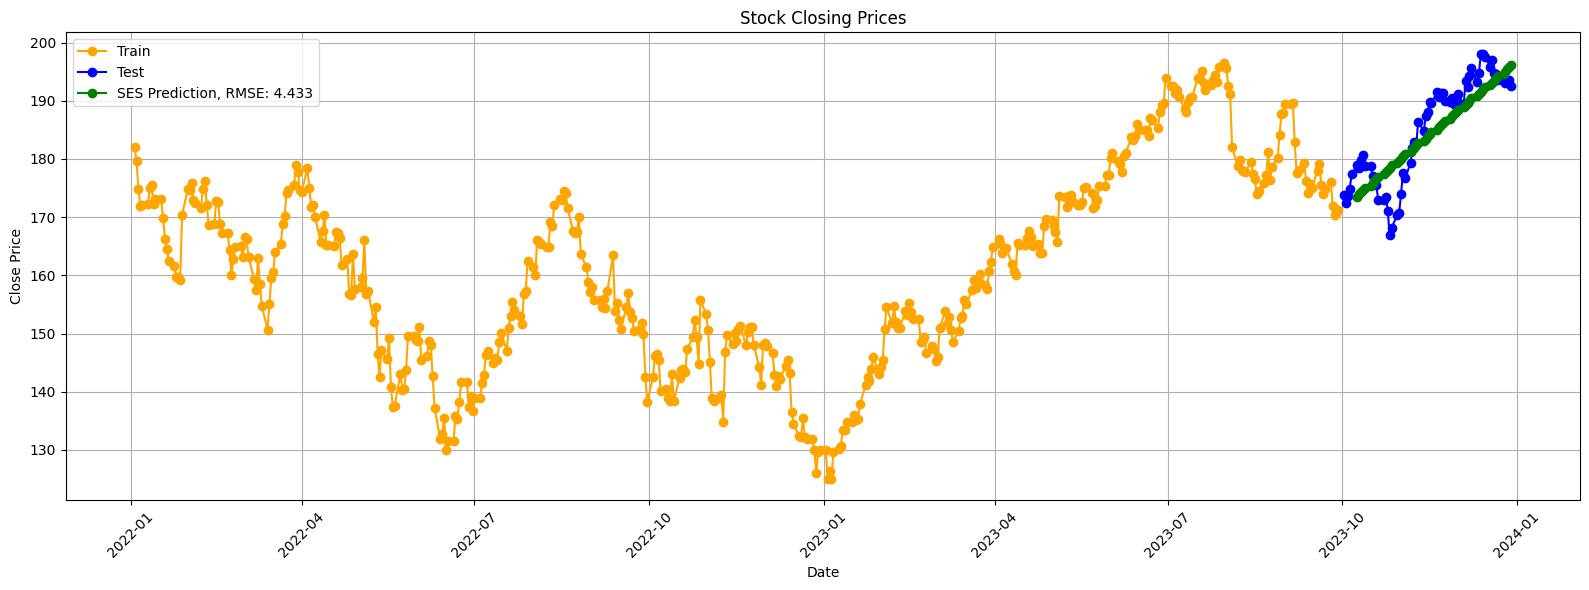

In [41]:

# Plotting
plt.figure(figsize=(16, 6))

# Plot train data
plt.plot(train_data.index, train_data['Close'], marker='o', color='orange', label='Train')
plt.plot(test_data.index, test_data['Close'], marker='o', color='blue', label='Test')
plt.plot(test_data.index[LOOK_BACK:], ses_predictions[LOOK_BACK:], marker='o', color='green', label=f'SES Prediction, RMSE: {rmse_score_ses :.3f}')

# Add labels and legend
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels


### Linear Regression - Multivariate Linear Regression

#### Linear Regression using Rolling Average features

In [53]:
X_train = train_data_assignment_specific.drop(["Close"], axis=1)
y_train = train_data_assignment_specific["Close"]

X_test = test_data_assignment_specific.drop(["Close"], axis=1)
y_test = test_data_assignment_specific["Close"]


In [54]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(446, 3) (56, 3) (446,) (56,)


In [57]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error


lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
lr_prediction_train = lr_model.predict(X_train)
lr_predictions_ts = lr_model.predict(X_test)
del lr_model

# Calculate performance metrics
mae_train = mean_absolute_error(y_train, lr_prediction_train)
mse_train = mean_squared_error(y_train, lr_prediction_train)
rmse_train = root_mean_squared_error(y_train, lr_prediction_train)

mae_test = mean_absolute_error(y_test, lr_predictions_ts)
mse_test = mean_squared_error(y_test, lr_predictions_ts)
rmse_score_lr_ts = root_mean_squared_error(y_test, lr_predictions_ts)


print(f'Linear Regression Train MAE: {mae_train}')
print(f'Linear Regression Train MSE: {mse_train}')
print(f'Linear Regression Train RMSE: {rmse_train}')
print("=================================================")
print(f'Linear Regression Test MAE: {mae_test}')
print(f'Linear Regression Test MSE: {mse_test}')
print(f'Linear Regression Test RMSE: {rmse_score_lr_ts}')
print("=================================================")

del mae_train, mse_train, rmse_train
del mae_test, mse_test


Linear Regression Train MAE: 1.5500212193090912
Linear Regression Train MSE: 3.999101636164106
Linear Regression Train RMSE: 1.9997753964293354
Linear Regression Test MAE: 0.8153174649636783
Linear Regression Test MSE: 1.177994457696362
Linear Regression Test RMSE: 1.08535453087752


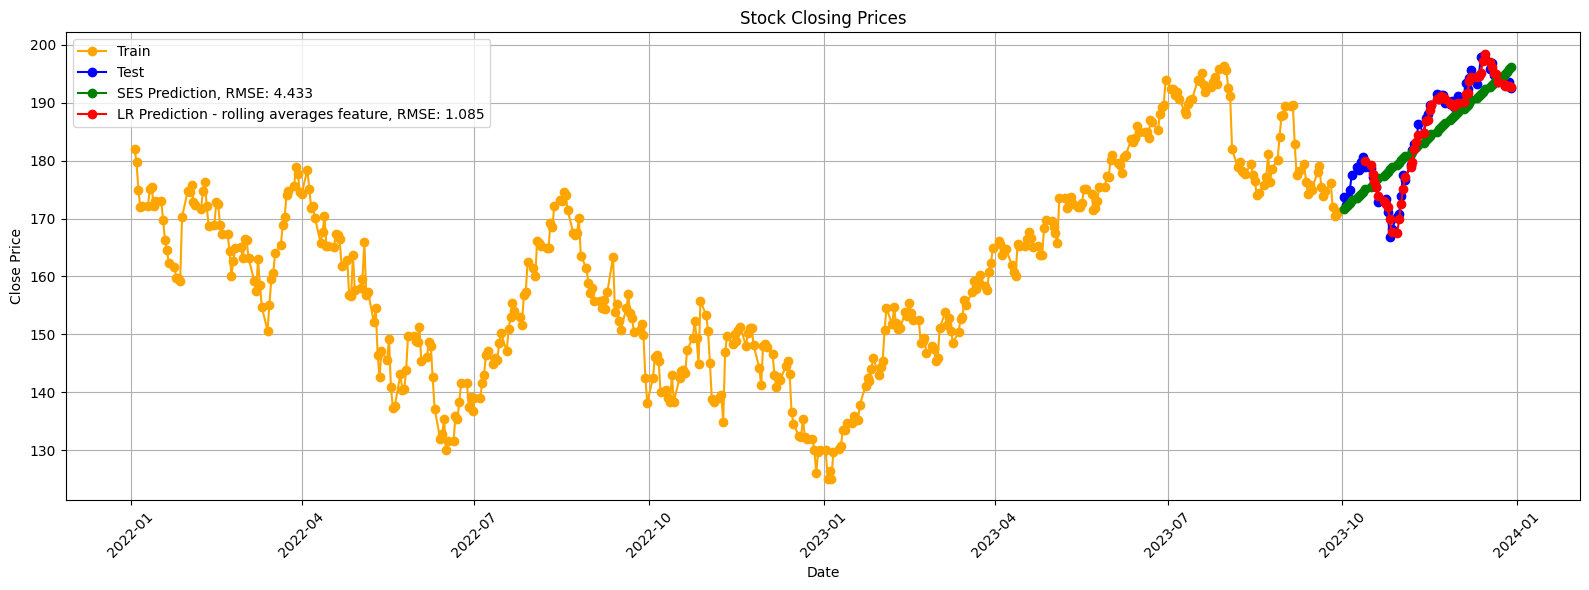

In [58]:

# Plotting
plt.figure(figsize=(16, 6))

# Plot train data
plt.plot(train_data.index, train_data['Close'], marker='o', color='orange', label='Train')
plt.plot(test_data.index, test_data['Close'], marker='o', color='blue', label='Test')
plt.plot(test_data.index, ses_predictions, marker='o', color='green', label=f'SES Prediction, RMSE: {rmse_score_ses :.3f}')
plt.plot(test_data.index[LOOK_BACK_COMPARISON:], lr_predictions_ts, marker='o', color='red', label=f'LR Prediction - rolling averages feature, RMSE: {rmse_score_lr_ts :.3f}')

# Add labels and legend
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels


#### Linear Regression using Different Features

In [59]:
X_train = train_data_ml.drop(["Close"], axis=1)
y_train = train_data_ml["Close"]

X_test = test_data_ml.drop(["Close"], axis=1)
y_test = test_data_ml["Close"]


In [60]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error


lr_model = LinearRegression()

lr_model.fit(X_train, y_train)
lr_prediction_train = lr_model.predict(X_train)
lr_predictions = lr_model.predict(X_test)
del lr_model

# Calculate performance metrics
mae_train = mean_absolute_error(y_train, lr_prediction_train)
mse_train = mean_squared_error(y_train, lr_prediction_train)
rmse_train = root_mean_squared_error(y_train, lr_prediction_train)

mae_test = mean_absolute_error(y_test, lr_predictions)
mse_test = mean_squared_error(y_test, lr_predictions)
rmse_score_lr = root_mean_squared_error(y_test, lr_predictions)


print(f'Linear Regression Train MAE: {mae_train}')
print(f'Linear Regression Train MSE: {mse_train}')
print(f'Linear Regression Train RMSE: {rmse_train}')
print("=================================================")
print(f'Linear Regression Test MAE: {mae_test}')
print(f'Linear Regression Test MSE: {mse_test}')
print(f'Linear Regression Test RMSE: {rmse_score_lr}')
print("=================================================")

del mae_train, mse_train, rmse_train
del mae_test, mse_test


Linear Regression Train MAE: 2.1725609088147593
Linear Regression Train MSE: 8.387405927249103
Linear Regression Train RMSE: 2.8961018502892992
Linear Regression Test MAE: 1.4730928491601247
Linear Regression Test MSE: 3.4676018767493746
Linear Regression Test RMSE: 1.8621497997608503


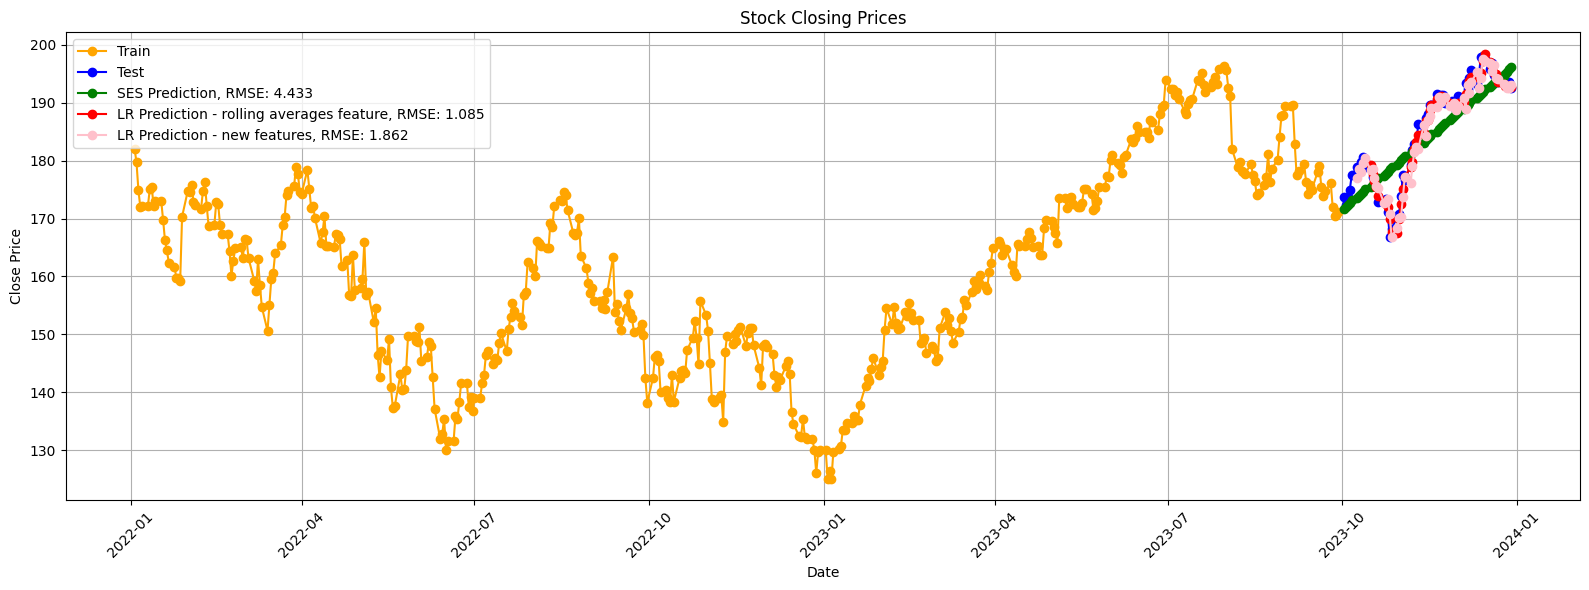

In [62]:


# Plotting
plt.figure(figsize=(16, 6))

# Plot train data
plt.plot(train_data.index, train_data['Close'], marker='o', color='orange', label='Train')
plt.plot(test_data.index, test_data['Close'], marker='o', color='blue', label='Test')
plt.plot(test_data.index, ses_predictions, marker='o', color='green', label=f'SES Prediction, RMSE: {rmse_score_ses :.3f}')
plt.plot(test_data.index[LOOK_BACK_COMPARISON:], lr_predictions_ts, marker='o', color='red', label=f'LR Prediction - rolling averages feature, RMSE: {rmse_score_lr_ts :.3f}')
plt.plot(test_data.index[LOOK_BACK:], lr_predictions, marker='o', color='pink', label=f'LR Prediction - new features, RMSE: {rmse_score_lr :.3f}')

# Add labels and legend
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels


### Long Short-Term Memory Model

In [63]:
import torch
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))

In [64]:
# train_data_ml, test_data_ml

In [65]:
train_data_ml.head()

,Close,Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1)
Date,,,,,,
2022-01-10,172.190002,182.009995,179.699997,174.919998,172.000000,172.169998
2022-01-11,175.080002,179.699997,174.919998,172.000000,172.169998,172.190002
2022-01-12,175.529999,174.919998,172.000000,172.169998,172.190002,175.080002
2022-01-13,172.190002,172.000000,172.169998,172.190002,175.080002,175.529999
2022-01-14,173.070007,172.169998,172.190002,175.080002,175.529999,172.190002


In [66]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data_ml.values[:, 1:], train_data_ml.values[:, 0], test_size=0.05, random_state=42)

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(427, 5) (427,) (23, 5) (23,)


In [67]:
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [68]:
import torch


# Reshape for model input
X_train = X_train.reshape((-1, LOOK_BACK, 1))
X_val = X_val.reshape((-1, LOOK_BACK, 1))
y_train = y_train.reshape((-1, 1))
y_val = y_val.reshape((-1, 1))

# Convert to PyTorch tensors
X_train, y_train = torch.tensor(X_train).float(), torch.tensor(y_train).float()
X_val, y_val = torch.tensor(X_val).float(), torch.tensor(y_val).float()

# Print shapes
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

torch.Size([427, 5, 1]) torch.Size([23, 5, 1]) torch.Size([427, 1]) torch.Size([23, 1])


In [69]:
BATCH_SIZE = 16

In [70]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
val_dataset = TimeSeriesDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(len(train_dataset), len(val_dataset))
print(len(train_loader), len(val_loader))

# del X_train, y_train, X_val, y_val
del train_dataset, val_dataset


427 23
27 2


In [71]:

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

for _, batch in enumerate(train_loader):
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    del x_batch, y_batch
    del batch
    break

torch.Size([16, 5, 1]) torch.Size([16, 1])


In [72]:
import torch.nn as nn



class EarlyStopping:
    def __init__(self, patience=10, delta=0):
        """
        Args:
            patience (int): Number of epochs with no improvement after which training will be stopped.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        """
        self.patience = patience
        self.delta = delta
        self.best_score = float('inf')  # For loss, 'inf' is used to track minimization
        self.early_stop = False
        self.counter = 0

    def __call__(self, val_loss):
        """
        Check whether training should be stopped early based on validation loss.

        Args:
            val_loss (float): The current validation loss.
        """
        score = val_loss
        
        if score < self.best_score - self.delta:
            self.best_score = score
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True



class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_stacked_layers = num_stacked_layers

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out



In [73]:
model = LSTM(1, 4, 1)
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [74]:

def train_one_epoch():
    model.train(True)
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        del output
        del x_batch, y_batch


    avg_loss_across_batches = running_loss / len(train_loader)
    print('Epoch {0}\n\tTrain Loss: {1:.3f}'.format(epoch+1, avg_loss_across_batches))
    
    del avg_loss_across_batches
    del running_loss
    
def validate_one_epoch():
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(val_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)

        with torch.no_grad():
            output = model(x_batch)
            loss = loss_function(output, y_batch)
            running_loss += loss.item()
            del output
        del x_batch, y_batch
        del batch_index, batch

    current_lr = optimizer.param_groups[0]['lr']
    avg_loss_across_batches = running_loss / len(val_loader)
    print('\tVal Loss: {0:.3f}, current LR: {1:.5f}\n'.format(avg_loss_across_batches, current_lr))
    # scheduler.step(avg_loss_across_batches)
    del running_loss
    
    
    return avg_loss_across_batches

    
learning_rate = 0.01
num_epochs = 1000
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
early_stopping = EarlyStopping(patience=20, delta=0.00001)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True, min_lr=1e-5)




for epoch in range(num_epochs):
    train_one_epoch()
    validation_loss_value = validate_one_epoch()
    print(epoch, validation_loss_value)
    
    early_stopping(validation_loss_value)
    if early_stopping.early_stop:    
        print("Early stopping triggered")
        break
    del validation_loss_value
    del epoch


del learning_rate, num_epochs, loss_function, optimizer
del train_one_epoch, validate_one_epoch
# del train_loader, val_loader

/usr/local/git/AIML_Financial_Services/.venv/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:60: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1
	Train Loss: 25820.422
	Val Loss: 26277.474, current LR: 0.01000

0 26277.4736328125
Epoch 2
	Train Loss: 25307.476
	Val Loss: 25546.606, current LR: 0.01000

1 25546.6064453125
Epoch 3
	Train Loss: 24608.128
	Val Loss: 24953.481, current LR: 0.01000

2 24953.4814453125
Epoch 4
	Train Loss: 24085.272
	Val Loss: 24440.335, current LR: 0.01000

3 24440.3349609375
Epoch 5
	Train Loss: 23626.864
	Val Loss: 23961.884, current LR: 0.01000

4 23961.8837890625
Epoch 6
	Train Loss: 23102.281
	Val Loss: 23504.065, current LR: 0.01000

5 23504.0654296875
Epoch 7
	Train Loss: 22692.068
	Val Loss: 23063.976, current LR: 0.01000

6 23063.9755859375
Epoch 8
	Train Loss: 22259.432
	Val Loss: 22636.967, current LR: 0.01000

7 22636.966796875
Epoch 9
	Train Loss: 21862.527
	Val Loss: 22219.553, current LR: 0.01000

8 22219.552734375
Epoch 10
	Train Loss: 21461.545
	Val Loss: 21812.668, current LR: 0.01000

9 21812.66796875
Epoch 11
	Train Loss: 21032.867
	Val Loss: 21411.584, current LR: 0.01000

##### Predicting on Test Data

In [75]:
test_data_ml.head()

,Close,Close(t-5),Close(t-4),Close(t-3),Close(t-2),Close(t-1)
Date,,,,,,
2023-10-09,178.990005,173.750000,172.399994,173.660004,174.910004,177.490005
2023-10-10,178.389999,172.399994,173.660004,174.910004,177.490005,178.990005
2023-10-11,179.800003,173.660004,174.910004,177.490005,178.990005,178.389999
2023-10-12,180.710007,174.910004,177.490005,178.990005,178.389999,179.800003
2023-10-13,178.850006,177.490005,178.990005,178.389999,179.800003,180.710007


In [76]:
# Prepare Test Dataloader
X_test, y_test = test_data_ml.values[:, 1:], test_data_ml.values[:, 0]

X_test = scaler.transform(X_test)
X_test = X_test.reshape((-1, LOOK_BACK, 1))
y_test = y_test.reshape((-1, 1))


# Convert to PyTorch tensors
X_test, y_test = torch.tensor(X_test).float(), torch.tensor(y_test).float()
print(X_test.shape, y_test.shape)


torch.Size([60, 5, 1]) torch.Size([60, 1])


In [77]:
model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    lstm_predictions = model(X_test.to(device)).to('cpu').numpy()

In [78]:
from sklearn.metrics import root_mean_squared_error

rmse_score_lstm = root_mean_squared_error(y_test, lstm_predictions)
print("RMSE Score for the LSTM model: ", rmse_score_lstm)

RMSE Score for the LSTM model:  2.4696965


## Comparison Report - Across Different Models

* Data has non-stationarity, seasonal patterns and trend as well, and **only few data points** to work with.
* SES has higher RMSE likely due to its simplicity and inability to model trends or seasonality.
* Linear Regression has lower RMSE because it effectively captures linear trends in the data.
* LSTM has an intermediate RMSE, which could be due to the model's complexity, potential overfitting, or inadequate training data.


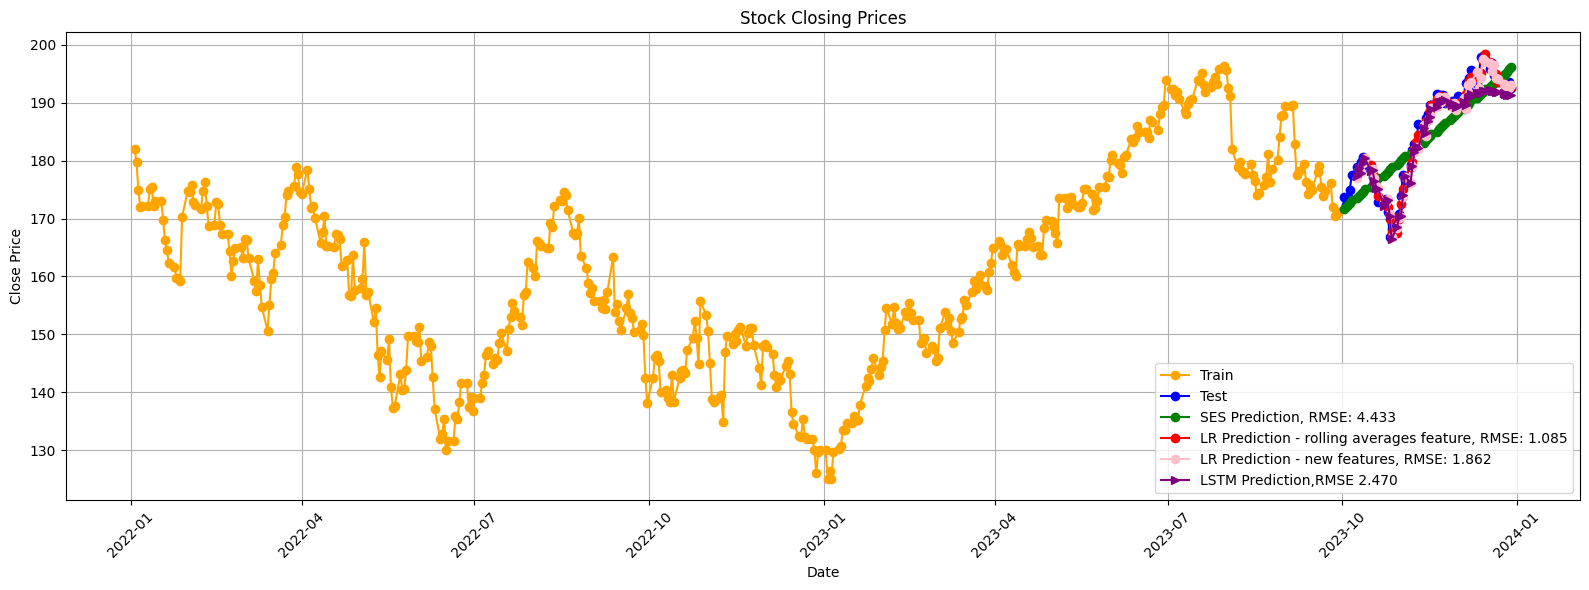

In [79]:

# Plotting
plt.figure(figsize=(16, 6))

# Plot train data
plt.plot(train_data.index, train_data['Close'], marker='o', color='orange', label='Train')
plt.plot(test_data.index, test_data['Close'], marker='o', color='blue', label='Test')
plt.plot(test_data.index, ses_predictions, marker='o', color='green', label=f'SES Prediction, RMSE: {rmse_score_ses :.3f}')
plt.plot(test_data.index[LOOK_BACK_COMPARISON:], lr_predictions_ts, marker='o', color='red', label=f'LR Prediction - rolling averages feature, RMSE: {rmse_score_lr_ts :.3f}')
plt.plot(test_data.index[LOOK_BACK:], lr_predictions, marker='o', color='pink', label=f'LR Prediction - new features, RMSE: {rmse_score_lr :.3f}')
plt.plot(test_data.index[LOOK_BACK:], lstm_predictions, marker='>', color='purple', label=f'LSTM Prediction,RMSE {rmse_score_lstm :.3f}')

# Add labels and legend
plt.title('Stock Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
